In [1]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [2]:
input <- mtcars[,c('mpg','disp','hp','wt')]
head(input)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


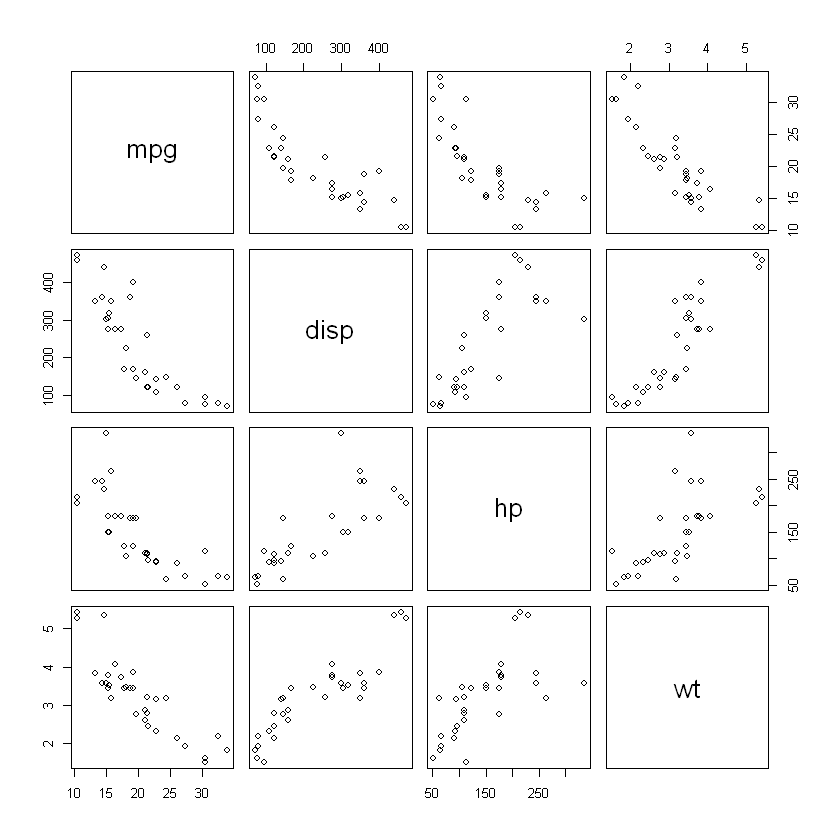

In [3]:
pairs(~mpg+disp+hp+wt, data=input)

In [4]:
library('ggplot2')
# libarry('gridExtra')

In [5]:
# plot <- ggplot(iris, aes(Petal.Width,Petal.Length)) +
#         geom_point() + geom_smooth(method='lm') +
#         theme_bw(base_size=14)
# plot

- Dữ liệu theo liner regression phân nhóm
- Length ~ Width tương quan thuận

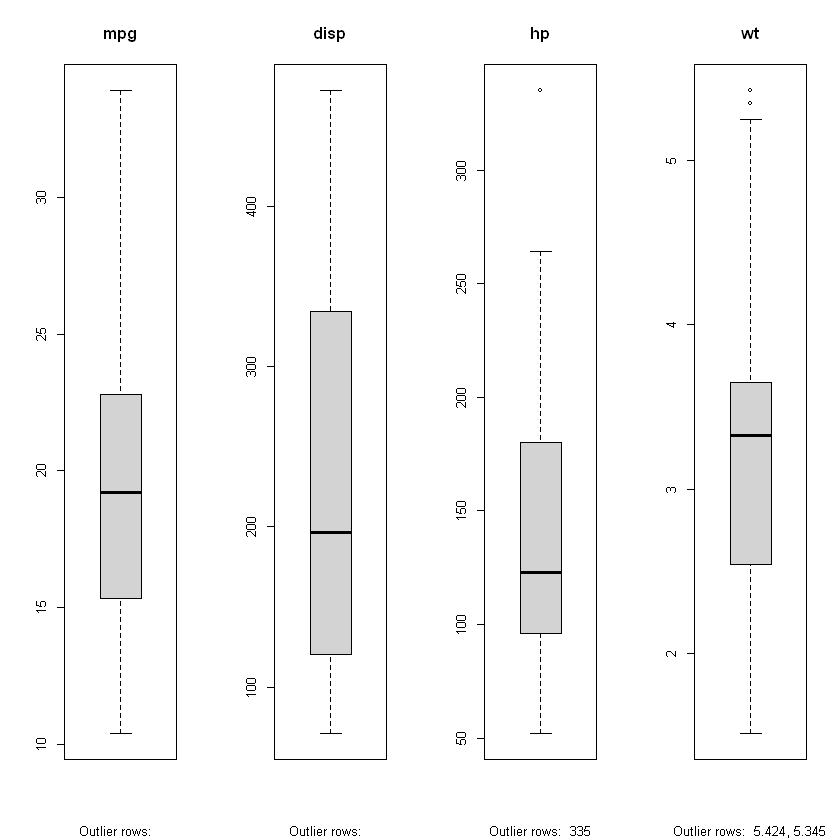

In [6]:
# mpg+disp+hp+wt, data=input)
par(mfrow=c(1,4))
boxplot(input$mpg, main='mpg',
      sub=paste('Outlier rows: ', toString(boxplot.stats(input$mpg)$out)))
boxplot(input$disp, main='disp',
      sub=paste('Outlier rows: ', toString(boxplot.stats(input$disp)$out)))
boxplot(input$hp, main='hp',
      sub=paste('Outlier rows: ', toString(boxplot.stats(input$hp)$out)))
boxplot(input$wt, main='wt',
      sub=paste('Outlier rows: ', toString(boxplot.stats(input$wt)$out)))


In [7]:
hp_outliers <- boxplot.stats(input$hp)$out
print(paste('hp Outliers :',sum(input$hp == hp_outliers[1])))
input <- input[input$hp != hp_outliers[1],]

[1] "hp Outliers : 1"


In [8]:
wt_outliers <- boxplot.stats(input$wt)$out
print(paste('wt Outliers: ',sum(input$wt == wt_outliers[1])+sum(input$wt == wt_outliers[2])))
input <- input[input$wt != wt_outliers[1],]
input <- input[input$wt != wt_outliers[2],]

[1] "wt Outliers:  2"


In [9]:
library('tidyverse')

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [10]:
input %>% filter()

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160.0,110,2.620
Mazda RX4 Wag,21.0,160.0,110,2.875
Datsun 710,22.8,108.0,93,2.320
Hornet 4 Drive,21.4,258.0,110,3.215
Hornet Sportabout,18.7,360.0,175,3.440
Valiant,18.1,225.0,105,3.460
Duster 360,14.3,360.0,245,3.570
Merc 240D,24.4,146.7,62,3.190
Merc 230,22.8,140.8,95,3.150


In [11]:
head(input)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


In [12]:
vars <- c('disp','hp','wt')

In [13]:
for (i in vars){
    print(paste(i,'&','mpg',cor(input$mpg,input[i])))
}

[1] "disp & mpg -0.829038898463271"
[1] "hp & mpg -0.799721338062536"
[1] "wt & mpg -0.883059645554251"


- features and target have inversed relationship


In [14]:
set.seed(42)
trainingRowIndex <- sample(1:nrow(input), 0.8*nrow(input))
print(trainingRowIndex)
trainingData <- input[trainingRowIndex,]
testData <- input[-trainingRowIndex,]
print(nrow(trainingData))
print(nrow(testData))

 [1] 17  5  1 25 10  4 18 29 15  7 24 28 14 19 26  2  3  9 12 16 23 20 11
[1] 23
[1] 6


In [15]:
print(vars)

[1] "disp" "hp"   "wt"  


In [16]:
lmMod <- lm(mpg~disp+hp+wt, data=trainingData)
lmMod


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Coefficients:
(Intercept)         disp           hp           wt  
   41.14944      0.01320     -0.05281     -5.22157  


In [17]:
iPred <- predict(lmMod, testData)
# iPred

In [18]:
mse <- mean(lmMod$residuals^2)
print(paste('mse train: ',mse))

[1] "mse train:  4.9035236695173"


In [19]:
mse_test <- mean((testData$mpg - iPred)^2)
print(paste('mse in test: ',mse_test))

[1] "mse in test:  4.49282285889091"


In [20]:
iPred_train <- predict(lmMod, trainingData)
# iPred_train

In [21]:
rsquare_train <- 1- sum((trainingData$mpg - iPred_train)^2)/
 sum((trainingData$mpg - mean(trainingData$mpg))^2)

In [22]:
rsquare_test <- 1- sum((testData$mpg - iPred)^2) /
sum((testData$mpg - mean(testData$mpg))^2)

In [23]:
rsquare_train/rsquare_test 

[1] 1.354511

In [24]:
rsquare_test

[1] 0.6342094

In [25]:
rsquare_train

[1] 0.8590436

- RSquare test & RSquare train > 92% 
- RSquare train ~ RSquare test Model non overfiting
- MSE test = 0.2171 Mean of Square Error very low

In [26]:
print(summary(lmMod))


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5460 -1.2036 -0.3469  1.2579  5.1846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.14944    2.34868  17.520 3.48e-13 ***
disp         0.01320    0.01101   1.199 0.245304    
hp          -0.05281    0.02003  -2.637 0.016260 *  
wt          -5.22157    1.22671  -4.257 0.000427 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.436 on 19 degrees of freedom
Multiple R-squared:  0.859,	Adjusted R-squared:  0.8368 
F-statistic:  38.6 on 3 and 19 DF,  p-value: 2.783e-08



In [27]:
STOP

ERROR: Error in eval(expr, envir, enclos): object 'STOP' not found


In [32]:
# print(coef(lmMod))
# beta_width <- coef(lmMod)['mpg']
# # beta_width

In [36]:
intercept <- coef(lmMod)['(Intercept)']

In [37]:
intercept

(Intercept) 
   41.14944

In [38]:
mdisp <- coef(lmMod)[2]
mhp <- coef(lmMod)[3]
mwt <- coef(lmMod)[4]

In [39]:
x = c(221,102,2.91)

In [40]:
y <- intercept + mdisp*x[1] + mhp*x[2] + mwt*x[3]

In [43]:
# y1 <- predict(lmMod, data.frame(mpg=x))

In [ ]:
print(y1)

In [ ]:
plot()